In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
def get_hv(file_name):
    with open(file_name) as file:
        hv = []
        
        for line in file:
            hv.append(float(line))
            
    return pd.DataFrame(data=hv, columns=['HV'])

def random_test(df1, df2, plot_hist = True):
    DORAND = 5000
    
    spread2 = df2.values
    spread1 = df1.values
    
    medianSpreadDiff = np.median(spread2) - np.median(spread1)
    meanSpreadDiff = np.mean(spread2) - np.mean(spread1)
    
    totalSpread = np.append(spread1.tolist(), spread2.tolist())
    
    randMedianSpreadDiff = np.nan * np.ones((DORAND,1))
    randMeanSpreadDiff = np.nan * np.ones((DORAND,1))
    
    for randPool in range(0, DORAND-1):
        new1Index = np.random.permutation(30)
        newSpread1 = totalSpread[new1Index[0:15]]
        newSpread2 = totalSpread[new1Index[15:30]]
        
        randMedianSpreadDiff[randPool] = np.median(newSpread2) - np.median(newSpread1)
        randMeanSpreadDiff[randPool] = np.mean(newSpread2) - np.mean(newSpread1)
        
    randMedianSpreadDiff[DORAND - 1] = medianSpreadDiff
    randMeanSpreadDiff[DORAND - 1] = meanSpreadDiff
    
    z = (meanSpreadDiff - np.mean(randMeanSpreadDiff) )/ np.std(randMeanSpreadDiff)
        
    limiar = 1.96 * np.std(randMeanSpreadDiff) + np.mean(randMeanSpreadDiff)
    
    if z <= -1.96:
        print('H1-')
    elif z >= 1.96:
        print('H1+')
    else:
        print('H0')
    print('Limiar =',limiar)
    print('z =',z)
    print('Mean Spread Diff',meanSpreadDiff)
    if plot_hist:
        plt.figure(figsize=(9,6))
        plt.hist(randMeanSpreadDiff,bins=100,color='gray', label='Distribution')
        plt.scatter(x=meanSpreadDiff,y=0,color='red',s=100,label='Observed Mean Difference')
        plt.scatter(x=limiar,y=0,color='black',s=100,label='Confidence Limiars (95%)')
        plt.scatter(x=-limiar,y=0,color='black',s=100,)
        plt.xticks(fontsize=(20))
        plt.yticks(fontsize=(18))
        plt.legend(fontsize = 'large')
        plt.show()

In [189]:
nsga = get_hv('nsga_hv_values_norm.txt')
moead = get_hv('moead_hv_values_norm.txt')

H1+
Limiar = 0.0066801690533
z = 3.09568183918
Mean Spread Diff 0.0105424333333


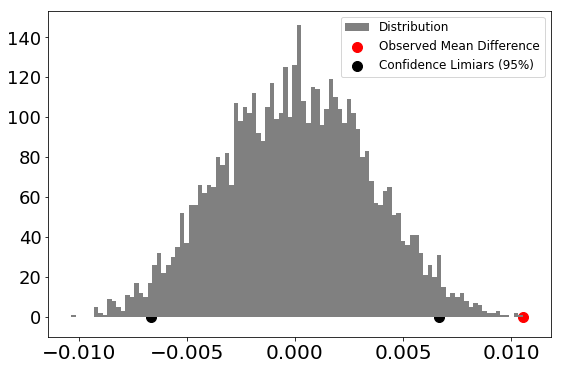

In [190]:
random_test(nsga, moead, True)